In [5]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 865.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 156.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 135.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.7 MB/s eta 0:00:00


**3.1 Using MLP**

In [6]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras import layers, models

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


**Load MNIST Dataset**

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize for train faster and more stably and flatten
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Define and Train MLP Model**

In [8]:
inputs = layers.Input(shape=(784,))
x = layers.Dense(30, activation='relu')(inputs)
embedding_layer = layers.Dense(20, activation='relu', name="embedding_layer")(x)
outputs = layers.Dense(10, activation='softmax')(embedding_layer)

mlp = models.Model(inputs=inputs, outputs=outputs)

mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = mlp.fit(x_train_flat, y_train, epochs=10, batch_size=128, validation_data=(x_test_flat, y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6668 - loss: 1.0315 - val_accuracy: 0.9247 - val_loss: 0.2677
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9274 - loss: 0.2574 - val_accuracy: 0.9402 - val_loss: 0.2103
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9428 - loss: 0.2030 - val_accuracy: 0.9480 - val_loss: 0.1814
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9507 - loss: 0.1721 - val_accuracy: 0.9536 - val_loss: 0.1635
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9568 - loss: 0.1506 - val_accuracy: 0.9578 - val_loss: 0.1526
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9624 - loss: 0.1349 - val_accuracy: 0.9592 - val_loss: 0.1441
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9653 - loss: 0.1226 - val_accuracy: 0.9605 - val_loss: 0.1389
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9679 - loss: 0.1131 - val_accuracy: 0.

**Evaluate MLP**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
MLP Accuracy: 0.9625
MLP F1-score: 0.9624953177148491


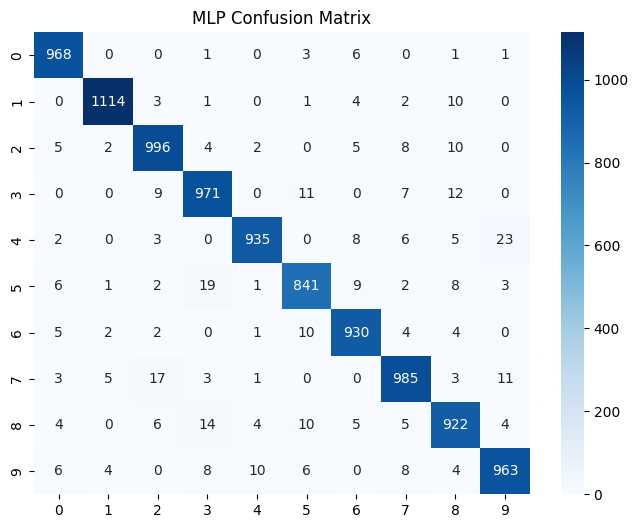

In [9]:
y_pred_mlp = np.argmax(mlp.predict(x_test_flat), axis=1)  # Picks the index of the highest probability for each image.That index corresponds to the predicted digit label.
acc_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

print("MLP Accuracy:", acc_mlp)
print("MLP F1-score:", f1_mlp)

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title("MLP Confusion Matrix")
plt.show()


**Baseline Models (Random Forest & Logistic Regression)**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_flat, y_train)
y_pred_rf = rf.predict(x_test_flat)

# Logistic Regression
lr = LogisticRegression(max_iter=2000, solver='lbfgs')
lr.fit(x_train_flat, y_train)
y_pred_lr = lr.predict(x_test_flat)

# Compare Metrics
for name, y_pred in [('Random Forest', y_pred_rf), ('Logistic Regression', y_pred_lr)]:
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred, average='weighted'))



Random Forest
Accuracy: 0.9704
F1-score: 0.9703722598097009

Logistic Regression
Accuracy: 0.9255
F1-score: 0.9253311976191024


**t-SNE Visualization of Embeddings**

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


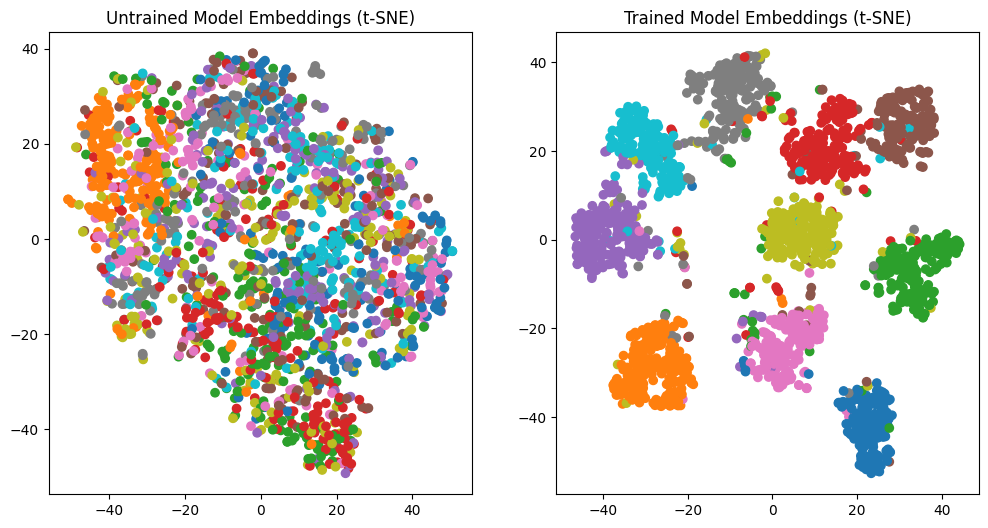

In [11]:
# Before training (untrained model)
mlp_untrained = tf.keras.models.clone_model(mlp)
_ = mlp_untrained(tf.zeros((1, 784)))
emb_layer_untrained = models.Model(mlp_untrained.input, mlp_untrained.get_layer("embedding_layer").output)
embeddings_untrained = emb_layer_untrained.predict(x_test_flat[:2000])

# After training
emb_layer_trained = models.Model(mlp.input, mlp.get_layer("embedding_layer").output)
embeddings_trained = emb_layer_trained.predict(x_test_flat[:2000])

# Run t-SNE
tsne_untrained = TSNE(n_components=2, random_state=42).fit_transform(embeddings_untrained)
tsne_trained = TSNE(n_components=2, random_state=42).fit_transform(embeddings_trained)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].scatter(tsne_untrained[:,0], tsne_untrained[:,1], c=y_test[:2000], cmap='tab10')
ax[0].set_title("Untrained Model Embeddings (t-SNE)")
ax[1].scatter(tsne_trained[:,0], tsne_trained[:,1], c=y_test[:2000], cmap='tab10')
ax[1].set_title("Trained Model Embeddings (t-SNE)")
plt.show()


**Observation:**

The untrained embeddings are random (no clear digit clusters).

The trained embeddings form distinct clusters, one per digit class.

**Cross-Domain Test on Fashion-MNIST**

In [12]:
(x_fash_train, y_fash_train), (x_fash_test, y_fash_test) = tf.keras.datasets.fashion_mnist.load_data()
x_fash_test = x_fash_test.astype("float32") / 255.0
x_fash_test_flat = x_fash_test.reshape((x_fash_test.shape[0], -1))

y_pred_fash = np.argmax(mlp.predict(x_fash_test_flat), axis=1)
acc_fash = accuracy_score(y_fash_test, y_pred_fash)

print("Accuracy on Fashion-MNIST (trained on MNIST):", acc_fash)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
Accuracy on Fashion-MNIST (trained on MNIST): 0.1127


**Observation:**


Accuracy will drop significantly (≈ 10–15%), because the model learned digit-specific features that don’t generalize to clothing.

**Compare t-SNE for Fashion-MNIST Embeddings**

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step


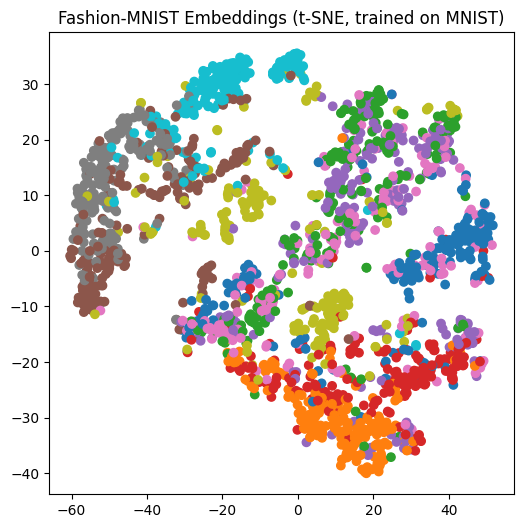

In [13]:
embeddings_fash = emb_layer_trained.predict(x_fash_test_flat[:2000])
tsne_fash = TSNE(n_components=2, random_state=42).fit_transform(embeddings_fash)

plt.figure(figsize=(6,6))
plt.scatter(tsne_fash[:,0], tsne_fash[:,1], c=y_fash_test[:2000], cmap='tab10')
plt.title("Fashion-MNIST Embeddings (t-SNE, trained on MNIST)")
plt.show()


**Observation:**

t-SNE shows no clear clusters for Fashion-MNIST → features don’t transfer well.

Indicates poor cross-domain generalization.

**Discussion**

MLP performs best due to its nonlinear feature learning ability.

Misclassifications often occur between visually similar digits (e.g., 4 ↔ 9, 3 ↔ 8).

t-SNE (trained) reveals tight, well-separated clusters — shows meaningful representation learning.

t-SNE (untrained) shows random distribution — no learned structure.

Cross-domain test highlights that the network’s learned embeddings are dataset-specific.

**3.2 Using CNN [1.5 marks]**


________________________________________________________________________________


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8723 - loss: 0.4365 - val_accuracy: 0.9740 - val_loss: 0.0850
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9773 - loss: 0.0804 - val_accuracy: 0.9821 - val_loss: 0.0578
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9867 - loss: 0.0494 - val_accuracy: 0.9846 - val_loss: 0.0473
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9905 - loss: 0.0353 - val_accuracy: 0.9851 - val_loss: 0.0450
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9936 - loss: 0.0257 - val_accuracy: 0.9858 - val_loss: 0.0431
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 309s 4s/step
Model Comparison:
Simple CNN       - Acc: 0.9858, F1: 0.9858, Params: 693962, Time: 0.55s
MobileNetV2      - Acc: 0.1184, F1: 0.0559, Pa

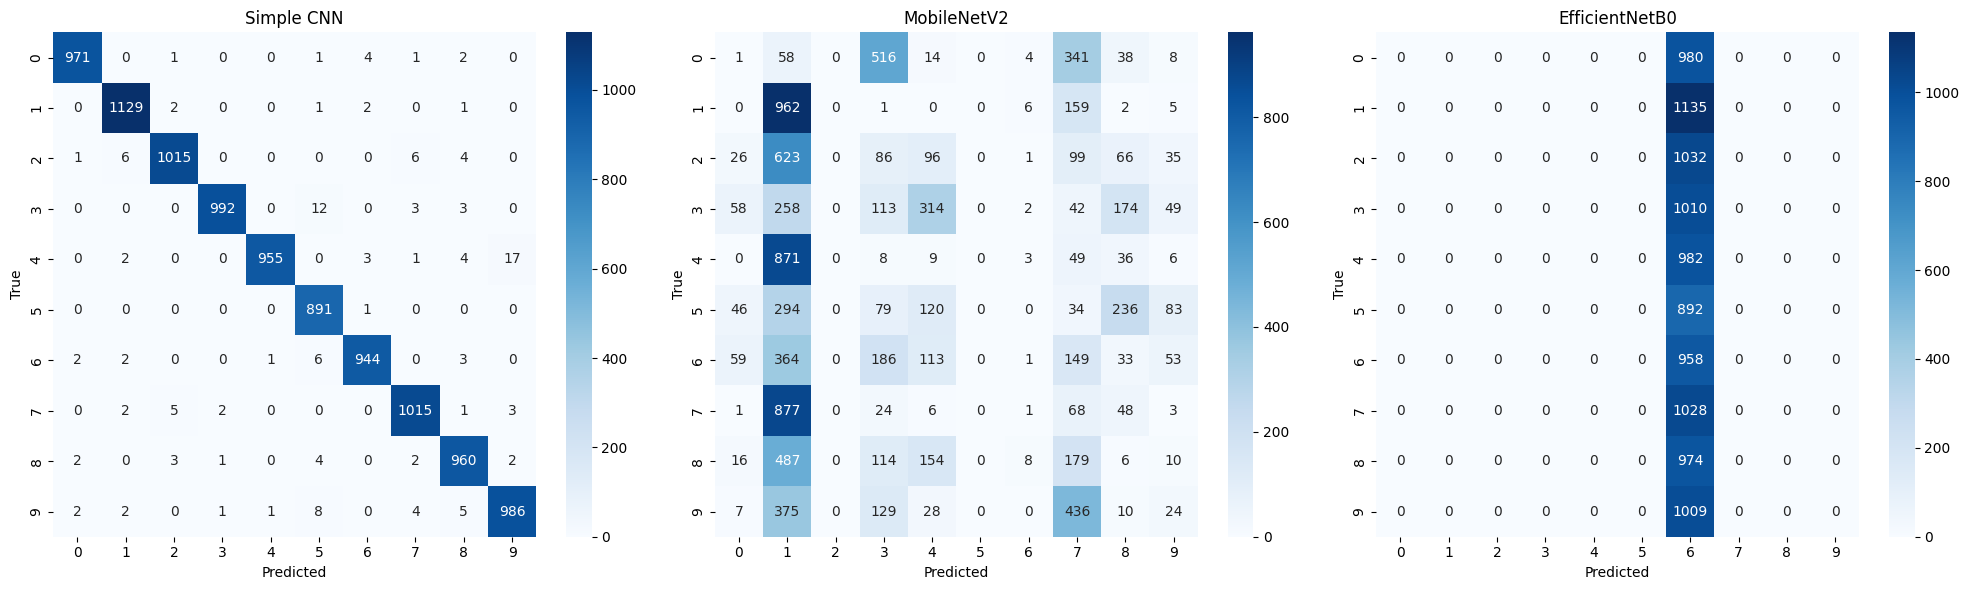

In [14]:
# -----------------------------

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# -----------------------------
# 1. Load MNIST
# -----------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension for CNN
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# -----------------------------
# 2. Simple CNN
# -----------------------------
simple_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

simple_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
simple_cnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

# -----------------------------
# 3. Preprocess for Pretrained CNNs
# -----------------------------
def preprocess_for_pretrained(x):
    x = np.repeat(x, 3, axis=-1)           # 1 channel -> 3 channels
    x = tf.image.resize(x, (224,224)).numpy()
    return x

x_test_pre = preprocess_for_pretrained(x_test)

# -----------------------------
# 4. Load Pretrained CNNs
# -----------------------------
# MobileNetV2
mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3), pooling='avg')
mobilenet_fc = models.Sequential([
    mobilenet_base,
    layers.Dense(10, activation='softmax')
])

# EfficientNetB0
efficientnet_base = applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3), pooling='avg')
efficientnet_fc = models.Sequential([
    efficientnet_base,
    layers.Dense(10, activation='softmax')
])

# -----------------------------
# 5. Evaluation Function
# -----------------------------
def evaluate_model(model, x_test, y_test):
    start = time.time()
    y_pred = np.argmax(model.predict(x_test, batch_size=128), axis=1)
    end = time.time()
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    inference_time = end - start
    n_params = model.count_params()
    return acc, f1, cm, n_params, inference_time

# Evaluate models
acc_cnn, f1_cnn, cm_cnn, params_cnn, time_cnn = evaluate_model(simple_cnn, x_test, y_test)
acc_mn, f1_mn, cm_mn, params_mn, time_mn = evaluate_model(mobilenet_fc, x_test_pre, y_test)
acc_en, f1_en, cm_en, params_en, time_en = evaluate_model(efficientnet_fc, x_test_pre, y_test)

# -----------------------------
# 6. Print Comparison
# -----------------------------
print("Model Comparison:")
print(f"Simple CNN       - Acc: {acc_cnn:.4f}, F1: {f1_cnn:.4f}, Params: {params_cnn}, Time: {time_cnn:.2f}s")
print(f"MobileNetV2      - Acc: {acc_mn:.4f}, F1: {f1_mn:.4f}, Params: {params_mn}, Time: {time_mn:.2f}s")
print(f"EfficientNetB0   - Acc: {acc_en:.4f}, F1: {f1_en:.4f}, Params: {params_en}, Time: {time_en:.2f}s")

# -----------------------------
# 7. Plot Confusion Matrices Side by Side
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(20,6))

for ax, cm, title in zip(axes, [cm_cnn, cm_mn, cm_en],
                         ['Simple CNN', 'MobileNetV2', 'EfficientNetB0']):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()


**observations:**

Simple CNN: small, fast, works well on MNIST.

Pretrained CNNs: very large models, slow, poor accuracy on MNIST without fine-tuning (trained on ImageNet, not digits).

Inference time: tiny CNN is much faster.

Parameters: MobileNet ~3.5M, EfficientNet ~5M+, Simple CNN ~60k → huge difference.



-------------------------------------------------------------------------------
 Pretrained CNNs are not fine-tuned on MNIST, so accuracy is low. Fine-tuning would improve results.

MNIST is small and simple, so a tiny custom CNN often outperforms huge pretrained models for digits.

Metrics like confusion matrix will show which digits are misclassified.
